#### Credit Card Fraud Dection
###### Procedure to process:
1. load data
2.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [78]:
data = pd.read_csv("../Datasets/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [79]:
data.shape

(284807, 31)

In [80]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


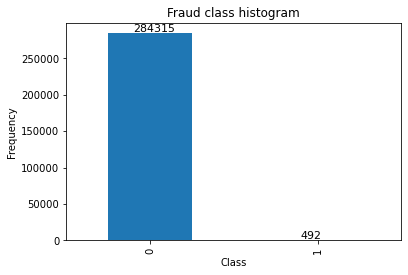

In [81]:
count_classes = pd.value_counts(data["Class"], sort = True).sort_index()
ax = count_classes.plot(kind = "bar")
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
for value, p in zip(count_classes.values, count_classes.index): 
    plt.text(p-0.1, value + 2000,value, fontsize = 11)

Stardant Data process

In [82]:
from sklearn.preprocessing import StandardScaler

data["normAmount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### Under sample

In [83]:
X = data.iloc[:, data.columns != "Class"]
y = data.iloc[:, data.columns =='Class']

# get the index for all fraud data records
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# get the index for all no fraud data records
normal_indices = np.array(data[data.Class == 0].index)

# get a random list of normal sample
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

#get all under_sample_data
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns =='Class']

#under sample data summary

print("Ratio of Normal smpale: ", len(under_sample_data[under_sample_data.Class ==0])/len(under_sample_data))
print("Ratio of Fraud smpale: ", len(under_sample_data[under_sample_data.Class ==1])/len(under_sample_data))
print("Total of under smpale data: ", len(under_sample_data))

Ratio of Normal smpale:  0.5
Ratio of Fraud smpale:  0.5
Total of under smpale data:  984


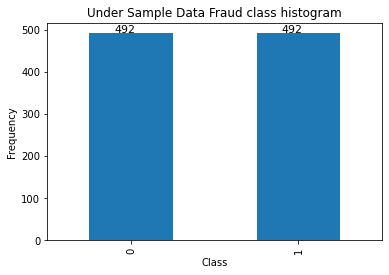

In [84]:
# Show the histgram of under sample data
count_classes = pd.value_counts(under_sample_data["Class"], sort = True).sort_index()
ax = count_classes.plot(kind = "bar")
plt.title("Under Sample Data Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
for value, p in zip(count_classes.values, count_classes.index): 
    plt.text(p-0.1, value + 2,value, fontsize = 11)

Divide Data For Cross_validation

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print("The number of original training data: ", len(X_train))
print("The number of original testing data: ", len(X_test))
print("The total of original data", len(X_train) + len(X_test))

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, 
                                                                                                    y_undersample, test_size=0.2,random_state = 0)
print("\n")
print("The number of undersample training data: ", len(X_train_undersample))
print("The number of undersample testing data: ", len(X_test_undersample))
print("The total of undersample data", len(X_train_undersample) + len(X_test_undersample))                                                                                                     
                                                                                                    


The number of original training data:  227845
The number of original testing data:  56962
The total of original data 284807


The number of undersample training data:  787
The number of undersample testing data:  197
The total of undersample data 984


#### Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.model_selection import cross_val_predict

In [173]:
def printing_KFold_scores(x_train_data, y_train_data):
    kf = KFold(5, random_state=None, shuffle=False)
    fold = kf.split(x_train_data)
    c_param_range = [0.001,0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns =['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
   
    # k-fold 
    j = 0
    for c_param in c_param_range:
        
        print("----------------------------------------")
        print("c_param_value", c_param)
        print("----------------------------------------")
        recall_accs = []
        iteration = 1 
        fold = kf.split(x_train_data)
        for train_index, valid_index in fold:
           lr = LogisticRegression (C=c_param, penalty = 'l2')
           lr.fit(x_train_data.iloc[train_index,:], y_train_data.iloc[train_index,:].values.ravel())
        
           y_pred_undersample = lr.predict(x_train_data.iloc[valid_index,:].values)
           recall_acc = recall_score(y_train_data.iloc[valid_index,:].values,y_pred_undersample)
           
           recall_accs.append(recall_acc) 
           print("Iteration",iteration, "recall:", recall_acc ) 
           iteration = iteration +1 
        
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j +=1
        
        print("")
        print("mean recall", np.mean(recall_accs))
        print("")
        
    best_c = results_table.loc[results_table["Mean recall score"].astype('float64').idxmax()]['C_parameter']    
   

    print("*********************************") 
    print("best c", best_c)
    print("*********************************") 
    
    return best_c

In [181]:
best_c = printing_KFold_scores(X_train_undersample, y_train_undersample)

----------------------------------------
c_param_value 0.001
----------------------------------------
Iteration 1 recall: 0.7865168539325843
Iteration 2 recall: 0.8214285714285714
Iteration 3 recall: 0.7971014492753623
Iteration 4 recall: 0.8658536585365854
Iteration 5 recall: 0.8701298701298701

mean recall 0.8282060806605946

----------------------------------------
c_param_value 0.01
----------------------------------------
Iteration 1 recall: 0.8314606741573034
Iteration 2 recall: 0.8452380952380952
Iteration 3 recall: 0.8695652173913043
Iteration 4 recall: 0.9512195121951219
Iteration 5 recall: 0.8961038961038961

mean recall 0.8787174790171441

----------------------------------------
c_param_value 0.1
----------------------------------------
Iteration 1 recall: 0.8876404494382022
Iteration 2 recall: 0.8452380952380952
Iteration 3 recall: 0.8985507246376812
Iteration 4 recall: 0.9634146341463414
Iteration 5 recall: 0.9090909090909091

mean recall 0.9007869625102458

-------------

/Users/p0z00cx/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/p0z00cx/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [185]:
def plot_confusion_matrix(cm, classes, title = "confuction matrix", cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation ='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max()/2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment ='center', color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Test with undersample data

recall 0.9456521739130435


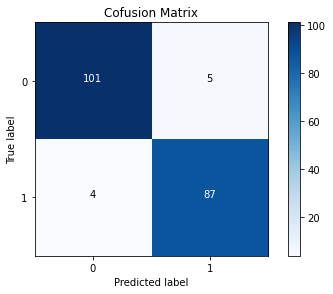

In [188]:
import itertools

lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision = 2)

print("precision", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
print("recall", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Cofusion Matrix")

plt.show()

### test with real data

precision 0.040962837837837836
recall 0.9603960396039604


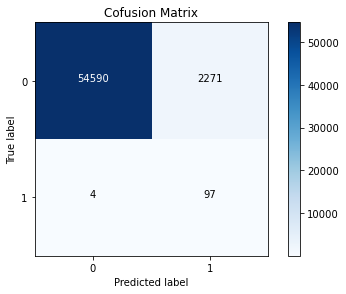

In [191]:
import itertools

lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

print("precision", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
print("recall", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Cofusion Matrix")

plt.show()

In [197]:
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
print(pd.DataFrame(y_pred_undersample_proba[:,1] ))

            0
0    0.051638
1    0.066776
2    1.000000
3    0.038447
4    0.009908
..        ...
192  1.000000
193  0.159898
194  1.000000
195  0.000176
196  0.015430

[197 rows x 1 columns]


#### Investigate the effec of the threshold 

threshold value: 0.1 recall value:  0.989010989010989
threshold value: 0.2 recall value:  0.978021978021978
threshold value: 0.3 recall value:  0.978021978021978
threshold value: 0.4 recall value:  0.978021978021978
threshold value: 0.5 recall value:  0.9560439560439561
threshold value: 0.6 recall value:  0.945054945054945
threshold value: 0.7 recall value:  0.9340659340659341
threshold value: 0.8 recall value:  0.9340659340659341
threshold value: 0.9 recall value:  0.8791208791208791


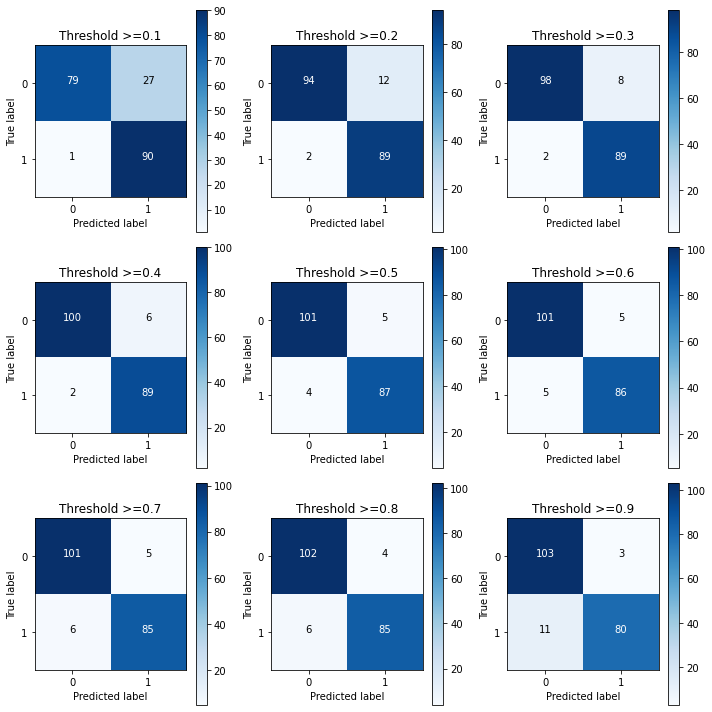

In [213]:
# use the best_c got from the above experiments
lr = LogisticRegression(C=10.0, penalty ='l2')

lr.fit(X_train_undersample, y_train_undersample.values.ravel())

y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize =(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j =j+1
    
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision = 2)
    
    print("threshold value:", i, "recall value: ", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Threshold >=%s"%i)



threshold value: 0.1 recall value:  0.801980198019802
threshold value: 0.1 precision value:  0.8350515463917526
threshold value: 0.2 recall value:  0.7722772277227723
threshold value: 0.2 precision value:  0.8387096774193549
threshold value: 0.3 recall value:  0.7326732673267327
threshold value: 0.3 precision value:  0.8604651162790697
threshold value: 0.4 recall value:  0.7029702970297029
threshold value: 0.4 precision value:  0.8765432098765432
threshold value: 0.5 recall value:  0.6435643564356436
threshold value: 0.5 precision value:  0.8783783783783784
threshold value: 0.6 recall value:  0.6237623762376238
threshold value: 0.6 precision value:  0.9
threshold value: 0.7 recall value:  0.594059405940594
threshold value: 0.7 precision value:  0.8955223880597015
threshold value: 0.8 recall value:  0.5544554455445545
threshold value: 0.8 precision value:  0.8888888888888888
threshold value: 0.9 recall value:  0.5247524752475248
threshold value: 0.9 precision value:  0.8983050847457628


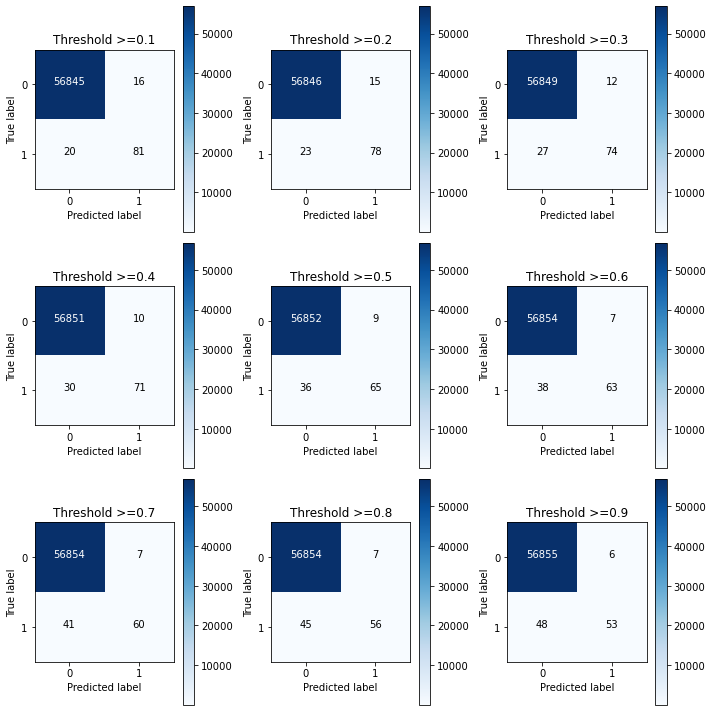

In [217]:
# use the best_c got from the above experiments
lr = LogisticRegression(C=10.0, penalty ='l2')

lr.fit(X_train, y_train.values.ravel())

y_pred_undersample_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize =(10,10))

j = 1

for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j =j+1
    
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision = 2)
    
    print("threshold value:", i, "recall value: ", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("threshold value:", i, "precision value: ",  cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Threshold >=%s"%i)

### Oversample - SMOTE solution

In [219]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [224]:
features = X.copy()
labels = y.copy()

features_train, features_test,labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0)

print("The number of original training data: ", len(features_train))
print("The number of original testing data: ", len(features_test))
print("The total of original data", len(features_train) + len(features_test))

The number of original training data:  227845
The number of original testing data:  56962
The total of original data 284807


In [231]:
oversampler = SMOTE(random_state = 0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

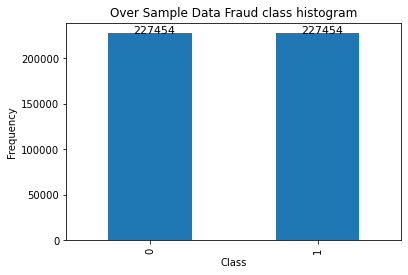

In [232]:
# Show the histgram of under sample data
count_classes = pd.value_counts(os_labels["Class"], sort = True).sort_index()
ax = count_classes.plot(kind = "bar")
plt.title("Over Sample Data Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
for value, p in zip(count_classes.values, count_classes.index): 
    plt.text(p-0.1, value + 2,value, fontsize = 11)

In [233]:
best_c = printing_KFold_scores(os_features, os_labels)

----------------------------------------
c_param_value 0.001
----------------------------------------
Iteration 1 recall: 0.9161290322580645
Iteration 2 recall: 0.9144736842105263
Iteration 3 recall: 0.9069602744273542
Iteration 4 recall: 0.8888559149712577
Iteration 5 recall: 0.8899220716413317

mean recall 0.903268195501707

----------------------------------------
c_param_value 0.01
----------------------------------------
Iteration 1 recall: 0.9161290322580645
Iteration 2 recall: 0.9144736842105263
Iteration 3 recall: 0.9105676662609273
Iteration 4 recall: 0.8931754981809389
Iteration 5 recall: 0.893626141721898

mean recall 0.905594404526471

----------------------------------------
c_param_value 0.1
----------------------------------------
Iteration 1 recall: 0.9161290322580645
Iteration 2 recall: 0.9144736842105263
Iteration 3 recall: 0.9115857032200951
Iteration 4 recall: 0.8943295852980293
Iteration 5 recall: 0.895120959321177

mean recall 0.9063277928615785

-----------------

precision 0.9734031807183632
recall 0.9108830796556666


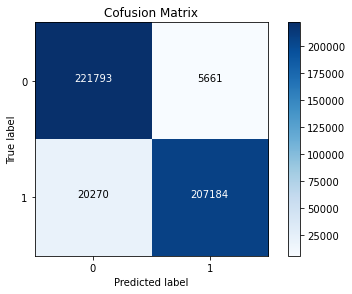

In [234]:
import itertools

lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(os_features, os_labels.values.ravel())
y_pred_oversample = lr.predict(os_features.values)

cnf_matrix = confusion_matrix(os_labels, y_pred_oversample)
np.set_printoptions(precision = 2)

print("precision", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
print("recall", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Cofusion Matrix")

plt.show()

precision 0.06295559973492379
recall 0.9405940594059405


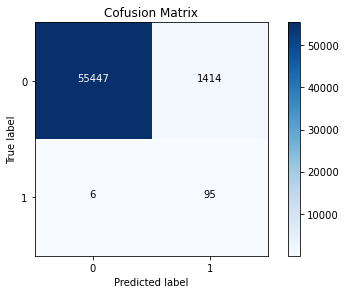

In [235]:
import itertools

lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(os_features, os_labels.values.ravel())
y_pred_oversample = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test, y_pred_oversample)
np.set_printoptions(precision = 2)

print("precision", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
print("recall", cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title ="Cofusion Matrix")

plt.show()

#### Summary
1. How to deal with unbalanced datea under sample and over sample 
2. preprocesing data